# Visualizing full corpus vs subset

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator

In [2]:
combined = pd.read_csv('C:\\Users\\Chloe\\Documents\\MaastrichtLaw&Tech\\Thesis\\MscThesis\\Dataset\\Metadata\\combined.csv')
subset = pd.read_csv("C:\\Users\\Chloe\\Documents\\MaastrichtLaw&Tech\\Thesis\\MscThesis\\Dataset\\Metadata\\subset.csv")

C:\Users\Chloe\AppData\Local\Temp\ipykernel_92308\1212836225.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(int(tick)) for tick in ax.get_xticks()])
C:\Users\Chloe\AppData\Local\Temp\ipykernel_92308\1212836225.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(int(tick)) for tick in ax.get_xticks()])


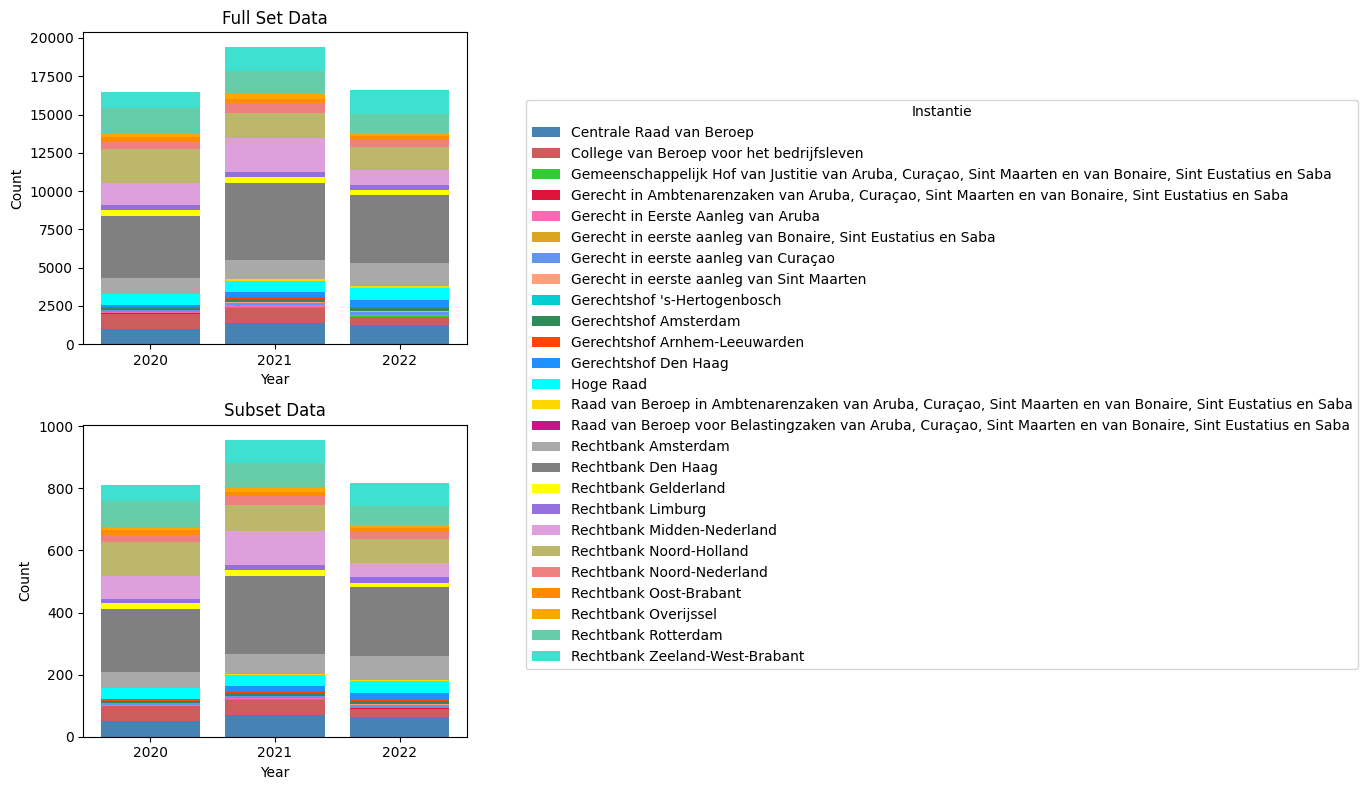

In [3]:
def plot_stacked_bar(ax, data, color_mapping, title):
    # Group by 'year' and 'instantie', then count the occurrences
    grouped = data.groupby(['year', 'instantie']).size().reset_index(name='count')

    # Pivot the data to get 'years' as rows and 'instanties' as columns
    pivoted = grouped.pivot(index='year', columns='instantie', values='count').fillna(0)

    # Compute the cumulative sum for stacking the bars
    cumsum = pivoted.cumsum(axis=1).reset_index()

    # Plot the bars
    bottom_values = pd.Series(0, index=pivoted.index)

    for instantie in pivoted.columns:
        ax.bar(
            cumsum['year'],
            pivoted[instantie],
            bottom=bottom_values,
            color=color_mapping[instantie],
            label=instantie
        )
        bottom_values += pivoted[instantie]

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(title)

    # Set x-axis to show only whole years
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.set_xticklabels([str(int(tick)) for tick in ax.get_xticks()])

# Define the HSV color palette
hsv_palette = sns.color_palette("hsv", 26)

# Define a custom darker pastel color palette
custom_palette = [
    "#4682B4", "#CD5C5C", "#32CD32", "#DC143C", "#FF69B4",
    "#DAA520", "#6495ED", "#FFA07A", "#00CED1", "#2E8B57",
    "#FF4500", "#1E90FF", "#00FFFF", "#FFD700", "#A9A9A9",
    "#808080", "#FFFF00", "#9370DB", "#DDA0DD", "#BDB76B",
    "#F08080", "#FF8C00", "#FFA500", "#66CDAA", "#40E0D0",
    "#C71585"
]

# Group by 'year' and 'instantie', then count the occurrences for the combined data
grouped_combined = combined.groupby(['year', 'instantie']).size().reset_index(name='value')

# Get unique instanties from the combined data
instanties_combined = grouped_combined['instantie'].unique()

# Create a color mapping for instanties
color_mapping = {instantie: custom_palette[i] for i, instantie in enumerate(instanties_combined)}

# Set the figure size and create subplots using GridSpec
fig = plt.figure(figsize=(14, 8))  # Adjust the overall figure size (width, height)
gs = GridSpec(2, 2, width_ratios=[2, 2], height_ratios=[1, 1])  # Adjust width and height ratios

# Plot the first dataframe 'combined'
ax0 = fig.add_subplot(gs[0, 0])
plot_stacked_bar(ax0, combined, color_mapping, 'Full Set Data')

# Plot the second dataframe 'subset'
ax1 = fig.add_subplot(gs[1, 0])
plot_stacked_bar(ax1, subset, color_mapping, 'Subset Data')

# Create a separate axis for the legend
ax2 = fig.add_subplot(gs[:, 1])
ax2.axis('off')

# Add the legend to the third subplot
handles, labels = ax0.get_legend_handles_labels()
ax2.legend(handles, labels, title='Instantie', loc='center', bbox_to_anchor=(1.2, 0.5))  # Move legend further to the right

# Adjust layout
plt.tight_layout()
plt.show()